In [27]:
import numpy as np
import math

def fi(x):
    return (8*x*x+4)*np.cos(x*x-5*x+3)

def dfi(x):
    return (16*x*np.cos(x*x-5*x+3)-(16*x**3-40*x*x+8*x-20)*np.sin(x*x-5*x+3))
    
y0 = fi(-3)
print(y0)

k=1/10
#k=0
def f(x,y):
    return (dfi(x)+k*(y-fi(x)))

N=320
h=7/N

-22.20254946377155


In [28]:
y = np.zeros(N+1)
epsOtn = np.zeros(N+1)
epsAbs = np.zeros(N+1)
epsM = np.zeros(7)
x = np.linspace(-3, 4, N+1)

y[0] = y0

1.914887900779151


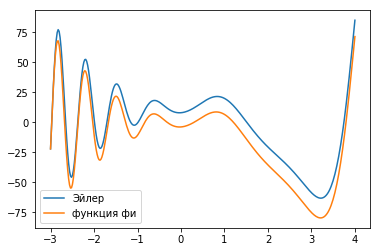

In [29]:
#Эйлер
for i in range(N):
        y[i+1]= y[i]+ h*f(x[i],y[i])
        a =[abs(fi(x[i+1])),abs(y[i+1])]
        epsOtn[i+1]= abs((fi(x[i+1])-y[i+1])/max(a))
        epsAbs[i+1]= abs(fi(x[i+1])-y[i+1])

epsMax = max(epsOtn)
#epsMax = max(epsAbs)
epsM[0]=epsMax
        
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y, label = 'Эйлер')
#plt.scatter(x, y)
plt.plot(x, fi(x), label = 'функция фи')
#plt.scatter(x, fi(x))
print (epsMax)

plt.legend()

1.914887900779151


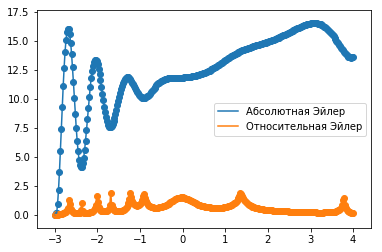

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,epsAbs, label = 'Абсолютная Эйлер')
plt.scatter(x, epsAbs)
plt.plot(x,epsOtn, label = 'Относительная Эйлер')
plt.scatter(x, epsOtn)

print (epsMax)

plt.legend()

1.6840778376439494


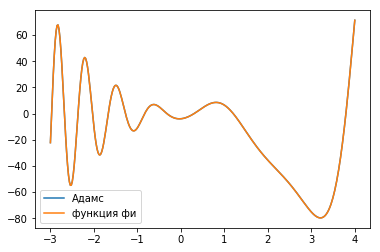

In [31]:
#Адамс
for i in range(3):                             
        k1= h*f(x[i],y[i])
        k2= h*f(x[i]+h/2,y[i]+k1/2)
        k3= h*f(x[i]+h,y[i]-k1+2*k2)
        y[i+1]= y[i]+ (k1+4*k2+k3)/6
        epsOtn[i+1]= abs(fi(x[i+1])-y[i+1])/max(a)
        epsAbs[i+1]= abs(fi(x[i+1])-y[i+1])

for i in range(N-3):
        y[i+4]= y[i+3]+ (h/24)*(55*f(x[i+3],y[i+3])-59*f(x[i+2],y[i+2])+37*f(x[i+1],y[i+1])-9*f(x[i],y[i]))
        a =[abs(fi(x[i+4])),abs(y[i+4])]
        epsOtn[i+4]= abs(fi(x[i+4])-y[i+4])/max(a)
        epsAbs[i+4]= abs(fi(x[i+4])-y[i+4])

epsMax = max(epsOtn)
#epsMax = max(epsAbs)
epsM[1]=epsMax
        
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y, label = 'Адамс')
#plt.scatter(x, y)
plt.plot(x, fi(x), label = 'функция фи')
#plt.scatter(x, fi(x))
print (epsMax)

plt.legend()

1.6840778376439494


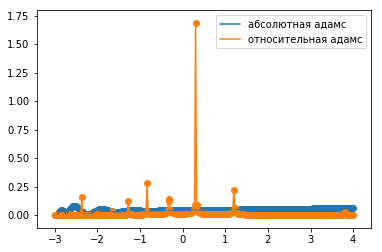

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,epsAbs, label = 'абсолютная адамс')
plt.scatter(x, epsAbs)
plt.plot(x,epsOtn, label = 'относительная адамс')
plt.scatter(x, epsOtn)

print (epsMax)

plt.legend()

0.7722758822282078


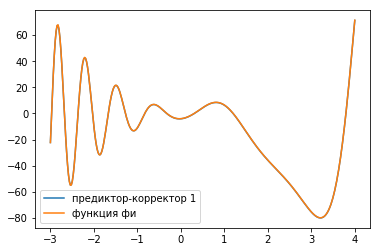

In [33]:
#Предиктор-корректор1
l = 10**(-4)
for i in range(N):                             #предиктор
        y[i+1]= y[i]+ h*f(x[i],y[i])
        ys1 = y[i+1]
        p = 10
        while p > l:
            ys2 = y[i]+(f(x[i],y[i])+f(x[i+1],ys1))*h/2
            p = abs(ys1-ys2)/abs(ys2)
            ys1 = ys2
        y[i+1] = ys2
        
        a =[abs(fi(x[i+1])),abs(y[i+1])]
        epsOtn[i+1]= abs(fi(x[i+1])-y[i+1])/max(a)
        epsAbs[i+1]= abs(fi(x[i+1])-y[i+1])

epsMax = max(epsOtn)
#epsMax = max(epsAbs)
epsM[2]=epsMax
        
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y, label = 'предиктор-корректор 1')
#plt.scatter(x, y)
plt.plot(x, fi(x), label = 'функция фи')
#plt.scatter(x, fi(x))
print (epsMax)
                        
plt.legend()

0.7722758822282078


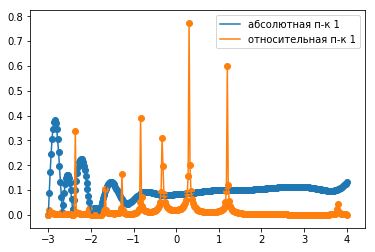

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,epsAbs, label = 'абсолютная п-к 1')
plt.scatter(x, epsAbs)
plt.plot(x,epsOtn, label = 'относительная п-к 1')
plt.scatter(x, epsOtn)

print (epsMax)

plt.legend()

0.15196799270315742


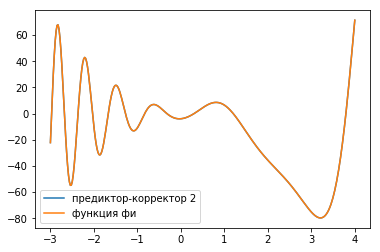

In [35]:
#Предиктор-корректор2
l = 10**(-4)
for i in range(3):                             
        k1= h*f(x[i],y[i])
        k2= h*f(x[i]+h/2,y[i]+k1/2)
        k3= h*f(x[i]+h,y[i]-k1+2*k2)
        y[i+1]= y[i]+ (k1+4*k2+k3)/6
        a =[abs(fi(x[i+1])),abs(y[i+1])]
        epsOtn[i+1]= abs(fi(x[i+1])-y[i+1])/max(a)
        epsAbs[i+1]= abs(fi(x[i+1])-y[i+1])
        
for i in range(N-3):
        y[i+4]= y[i+3]+(h/24)*(55*f(x[i+3],y[i+3])-59*f(x[i+2],y[i+2])+37*f(x[i+1],y[i+1])-9*f(x[i],y[i]))   #предиктор
        y[i+4]= y[i+3]+(h/24)*(9*f(x[i+4],y[i+4]) +19*f(x[i+3],y[i+3])-5*f(x[i+2],y[i+2])+f(x[i+1],y[i+1]))
        a =[abs(fi(x[i+1])),abs(y[i+1])]
        epsOtn[i+4]= abs(fi(x[i+4])-y[i+4])/max(a)
        epsAbs[i+4]= abs(fi(x[i+4])-y[i+4])

epsMax = max(epsOtn)
#epsMax = max(epsAbs)
epsM[3]=epsMax
        
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y, label = 'предиктор-корректор 2')
#plt.scatter(x, y)
plt.plot(x, fi(x), label = 'функция фи')
#plt.scatter(x, fi(x))
print (epsMax)
                        
plt.legend()

0.15196799270315742


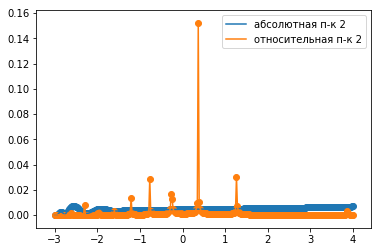

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,epsAbs, label = 'абсолютная п-к 2')
plt.scatter(x, epsAbs)
plt.plot(x,epsOtn, label = 'относительная п-к 2')
plt.scatter(x, epsOtn)

print (epsMax)

plt.legend()

0.00013316564262289438


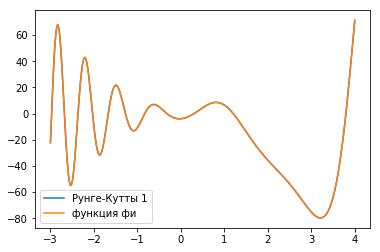

In [37]:
#Рунге-Кутты1
for i in range(N):
        k1= h*f(x[i],y[i])
        k2= h*f(x[i]+h/2,y[i]+k1/2)
        k3= h*f(x[i]+h,y[i]-k1+2*k2)
        y[i+1]= y[i]+ (k1+4*k2+k3)/6
        a =[abs(fi(x[i+1])),abs(y[i+1])]
        epsOtn[i+1]= abs(fi(x[i+1])-y[i+1])/max(a)
        epsAbs[i+1]= abs(fi(x[i+1])-y[i+1])

epsMax = max(epsOtn)
#epsMax = max(epsAbs)
epsM[4]=epsMax
        
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y, label = 'Рунге-Кутты 1')
#plt.scatter(x, y)
plt.plot(x, fi(x), label = 'функция фи')
#plt.scatter(x, fi(x))
print (epsMax)

plt.legend()

0.00013316564262289438


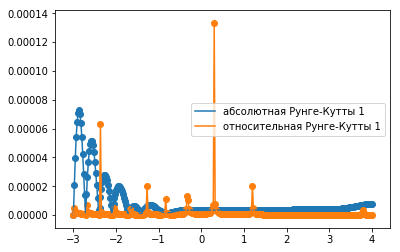

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,epsAbs, label = 'абсолютная Рунге-Кутты 1')
plt.scatter(x, epsAbs)
plt.plot(x,epsOtn, label = 'относительная Рунге-Кутты 1')
plt.scatter(x, epsOtn)

print (epsMax)

plt.legend()

0.00031756043857450553


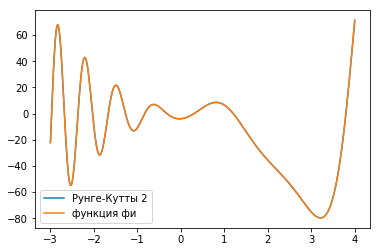

In [39]:
#Рунге-Кутты2
for i in range(N):
        k1= h*f(x[i],y[i])
        k2= h*f(x[i]+h/2,y[i]+k1/2)
        k3= h*f(x[i]+h/2,y[i]+k2/2)
        k4= h*f(x[i]+h,y[i]+k3)
        y[i+1]= y[i]+ (k1+2*k2+2*k3+k4)/6
        a =[abs(fi(x[i+1])),abs(y[i+1])]
        epsOtn[i+1]= abs(fi(x[i+1])-y[i+1])/max(a)
        epsAbs[i+1]= abs(fi(x[i+1])-y[i+1])

epsMax = max(epsOtn)
#epsMax = max(epsAbs)
epsM[5]=epsMax
        
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y, label = 'Рунге-Кутты 2')
#plt.scatter(x, y)
plt.plot(x, fi(x), label = 'функция фи')
#plt.scatter(x, fi(x))
print (epsMax)

plt.legend()

0.00031756043857450553


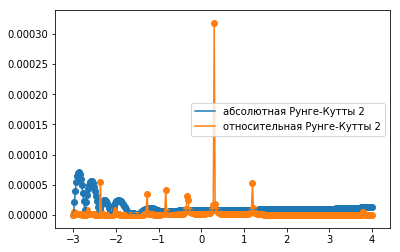

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,epsAbs, label = 'абсолютная Рунге-Кутты 2')
plt.scatter(x, epsAbs)
plt.plot(x,epsOtn, label = 'относительная Рунге-Кутты 2')
plt.scatter(x, epsOtn)

print (epsMax)

plt.legend()

0.5438510640974883


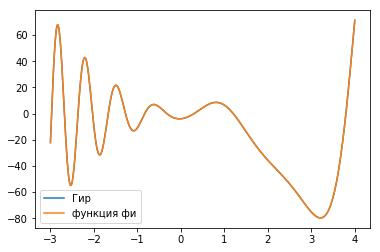

In [41]:
#Гир
for i in range(3):
        k1= h*f(x[i],y[i])
        k2= h*f(x[i]+h/2,y[i]+k1/2)
        k3= h*f(x[i]+h/2,y[i]+k2/2)
        k4= h*f(x[i]+h,y[i]+k3)
        y[i+1]= y[i]+ (k1+2*k2+2*k3+k4)/6
        a =[abs(fi(x[i+1])),abs(y[i+1])]
        epsOtn[i+1]= abs(fi(x[i+1])-y[i+1])/max(a)
        epsAbs[i+1]= abs(fi(x[i+1])-y[i+1])

for i in range(N-3):
        y[i+4]= (-48*y[i+3]+ 36*y[i+2]-16*y[i+1]+3*y[i]-12*h*dfi(x[i+4])+12*h*k*fi(x[i+4]))/(12*h*k-25)
        a =[abs(fi(x[i+1])),abs(y[i+1])]
        epsOtn[i+4]= abs(fi(x[i+4])-y[i+4])/max(a)
        epsAbs[i+4]= abs(fi(x[i+4])-y[i+4])

epsMax = max(epsOtn)
#epsMax = max(epsAbs)
epsM[6]=epsMax
        
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y, label = 'Гир')
#plt.scatter(x, y)
plt.plot(x, fi(x), label = 'функция фи')
#plt.scatter(x, fi(x))
print (epsMax)

plt.legend()

0.5438510640974883


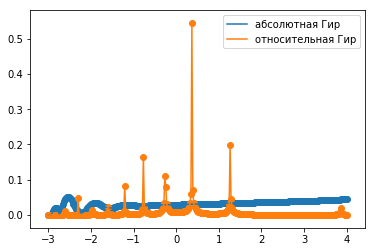

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,epsAbs, label = 'абсолютная Гир')
plt.scatter(x, epsAbs)
plt.plot(x,epsOtn, label = 'относительная Гир')
plt.scatter(x, epsOtn)

print (epsMax)

plt.legend()

In [17]:
print (epsM)

[1.91488790e+00 1.68407784e+00 7.72275882e-01 1.51967993e-01
 1.33165643e-04 3.17560439e-04 5.43851064e-01]


In [18]:
EM1 = [
1987.38508727,    
1544.40040808,    
279.71757053,    
1.26926503e+02,   
6.45100094e+01,
3.28143752e+01,  
1.65467231e+01, 
8.30844679e+00,   
4.16301628e+00,   
2.08370885e+00,  
1.04240495e+00,   
5.21340167e-01,  
2.60704499e-01,
1.30360854e-01,  
6.51825781e-02,   
3.25918268e-02,   
1.62960479e-02,
8.14805755e-03
]
EM2 = [
910.8400277352602,
559.4013344340491,
1009.4608771982519,
218.9512694468339,
34.79458437016818,
1.7294995974986023,
0.08250331896888952,
0.004249224764812709,
0.0002592262415106461,
1.7181011550349012e-05,
1.104680400487723e-06,
7.001192159350467e-08,
4.4061252424398845e-09,
2.764224404927518e-10,
1.737987531669205e-11,
1.1937117960769683e-12,
1.4352963262354024e-12,
3.396394276933279e-12
]
EM3 = [
1439.75315204,
1213.55721666,
51.38982258,
2.47207389e+01,
5.98843463e+00,
1.49567585e+00,
3.80614482e-01,
9.51041262e-02,
2.37730129e-02,
5.94374837e-03,
1.48642904e-03,
3.63578422e-04,
9.08725865e-05,
2.27171354e-05,
5.67918995e-06,
1.41979270e-06,
3.54948341e-07,
8.87371527e-08
]
EM4 = [
1178.64839061,
425.74245484,
144.69969559,
2.21262006e+01,
2.05358773e+00,
1.64861170e-01,
7.18169725e-03,
3.56126015e-04,
1.89187151e-05,
1.26171695e-06,
8.23890218e-08,
5.26080868e-09,
3.32306627e-10,
2.10107487e-11,
1.54898316e-12,
8.02913291e-13,
1.63424829e-12,
3.83693077e-12
]
EM5 = [
1140.24633036,
423.45926468,
7.34266764,
2.56199513e-01,
1.67474312e-02,
1.15071799e-03,
7.28670668e-05,
4.69714348e-06,
3.13247199e-07,
2.24628280e-08,
1.87299065e-09,
1.96067163e-10,
2.43716158e-11,
3.04467562e-12,
7.53175300e-13,
9.09494702e-13,
1.87583282e-12,
3.80140364e-12]
EM6 = [
1138.63689076,
424.56861131,
7.37386248,
2.55189011e-01,
1.67312364e-02,
1.13559473e-03,
7.07500676e-05,
4.42134329e-06,
2.76727654e-07,
1.72944965e-08,
1.08092024e-09,
6.76863010e-11,
4.28457270e-12,
4.97379915e-13,
4.83169060e-13,
7.53175300e-13,
1.87583282e-12,
3.80140364e-12]
EM7 = [
1345.06423474,
490.71248726,
189.14066038,
4.87043157e+01,
1.88378485e+01,
1.15007027e+00,
5.13391817e-02,
2.58043762e-03,
1.44063631e-04,
9.70964913e-06,
6.29121466e-07,
4.00208009e-08,
2.52201460e-09,
1.57022839e-10,
4.41655601e-11,
3.47730733e-10,
4.27961666e-10,
1.13172760e-09]

In [19]:
p1 = np.zeros(17)
p2 = np.zeros(17)
p3 = np.zeros(17)
p4 = np.zeros(17)
p5 = np.zeros(17)
p6 = np.zeros(17) 
p7 = np.zeros(17)

for i in range(17):
        p1[i]=math.log2(abs(EM1[i]/EM1[i+1]))
        
for i in range(17):
        p2[i]=math.log2(abs(EM2[i]/EM2[i+1]))
        
for i in range(17):
        p3[i]=math.log2(abs(EM3[i]/EM3[i+1]))
        
for i in range(17):
        p4[i]=math.log2(abs(EM4[i]/EM4[i+1]))
        
for i in range(17):
        p5[i]=math.log2(abs(EM5[i]/EM5[i+1]))
        
for i in range(17):
        p6[i]=math.log2(abs(EM6[i]/EM6[i+1]))
        
for i in range(17):
        p7[i]=math.log2(abs(EM7[i]/EM7[i+1]))  
        
print(p1,'\n', p2, '\n', p3,'\n', p4,'\n', p5,'\n', p6,'\n', p7)
      
  

[0.3638246  2.46500406 1.13997754 0.97639841 0.97519506 0.98778243
 0.99389483 0.9969496  0.99847549 0.99923787 0.99961892 0.99980954
 0.99990477 0.99995239 0.9999762  0.99998809 0.99999405] 
 [ 0.703314   -0.8516294   2.20490328  2.65367514  4.33043619  4.38975871
  4.27918059  4.03491598  3.91532489  3.95911404  3.97988462  3.9900182
  3.99456386  3.9913851   3.86389127 -0.26589406 -1.24265533] 
 [0.24657935 4.56161565 1.05576081 2.04547103 2.00138139 1.97439518
 2.00075062 2.00018318 1.99987981 1.99952245 2.03151211 2.00034953
 2.00006422 2.00002385 2.00000486 1.99999933 1.9999989 ] 
 [ 1.46908054  1.55691908  2.70923424  3.42953725  3.63882304  4.52078299
  4.3338651   4.23450181  3.90635391  3.93679237  3.96909562  3.98469762
  3.98331559  3.76173421  0.94800536 -1.02531109 -1.23132555] 
 [ 1.42905043  5.84977508  4.84096466  3.935256    3.86333361  3.98112358
  3.95541135  3.90641015  3.80169013  3.58412397  3.25592386  3.00807413
  3.00084147  2.01523094 -0.27207955 -1.04439412 

In [20]:
N2= [5,10,20,40,80,160,320,640,1280,2560,5120,10240,20480,40960,81920,163840,327680]
Ne= [5,10,20,40,80,160,320,640,1280,2560,5120,10240,20480,40960,81920,163840,327680,655360]

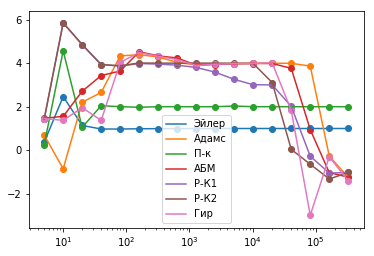

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
    
plt.plot(N2,p1, label = 'Эйлер')
plt.scatter(N2,p1)

plt.plot(N2,p2, label = 'Адамс')
plt.scatter(N2,p2)

plt.plot(N2,p3, label = 'П-к')
plt.scatter(N2,p3)

plt.plot(N2,p4, label = 'АБМ')
plt.scatter(N2,p4)

plt.plot(N2,p5, label = 'Р-К1')
plt.scatter(N2,p5)

plt.plot(N2,p6, label = 'Р-К2')
plt.scatter(N2,p6)

plt.plot(N2,p7, label = 'Гир')
plt.scatter(N2,p7)

plt.xscale('log')
#plt.yscale('log')
plt.legend()

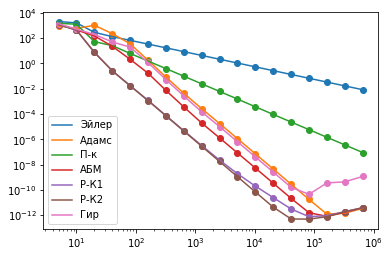

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
    
plt.plot(Ne,EM1, label = 'Эйлер')
plt.scatter(Ne,EM1)

plt.plot(Ne,EM2, label = 'Адамс')
plt.scatter(Ne,EM2)

plt.plot(Ne,EM3, label = 'П-к')
plt.scatter(Ne,EM3)

plt.plot(Ne,EM4, label = 'АБМ')
plt.scatter(Ne,EM4)

plt.plot(Ne,EM5, label = 'Р-К1')
plt.scatter(Ne,EM5)

plt.plot(Ne,EM6, label = 'Р-К2')
plt.scatter(Ne,EM6)

plt.plot(Ne,EM7, label = 'Гир')
plt.scatter(Ne,EM7)

plt.xscale('log')
plt.yscale('log')
plt.legend()

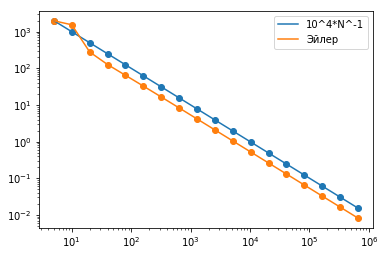

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

q = np.zeros(18)
for i in range(18):                   
    q[i] = 10000*Ne[i]**(-1)
plt.plot(Ne,q, label = '10^4*N^-1')
plt.scatter(Ne,q)
    
plt.plot(Ne,EM1, label = 'Эйлер')
plt.scatter(Ne,EM1)

plt.xscale('log')
plt.yscale('log')
plt.legend()

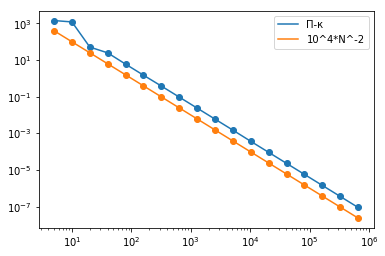

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(Ne,EM3, label = 'П-к')
plt.scatter(Ne,EM3)

q = np.zeros(18)
for i in range(18):                   
    q[i] = 10000*Ne[i]**(-2)
plt.plot(Ne,q, label = '10^4*N^-2')
plt.scatter(Ne,q)

plt.xscale('log')
plt.yscale('log')
plt.legend()

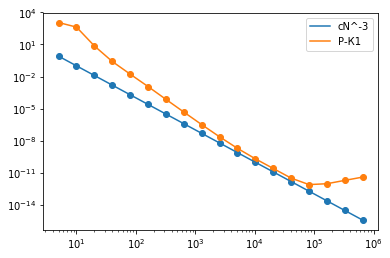

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

q = np.zeros(18)
for i in range(18):                   
    q[i] = 100*Ne[i]**(-3)
plt.plot(Ne,q, label = 'cN^-3')
plt.scatter(Ne,q)

plt.plot(Ne,EM5, label = 'Р-К1')
plt.scatter(Ne,EM5)

plt.xscale('log')
plt.yscale('log')
plt.legend()

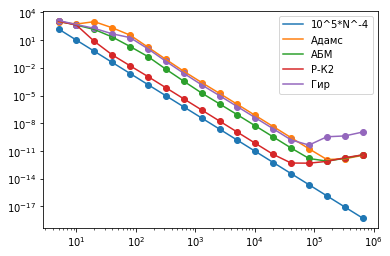

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

q = np.zeros(18)
for i in range(18):                   
    q[i] = 100000*Ne[i]**(-4)
plt.plot(Ne,q, label = '10^5*N^-4')
plt.scatter(Ne,q)

plt.plot(Ne,EM2, label = 'Адамс')
plt.scatter(Ne,EM2)

plt.plot(Ne,EM4, label = 'АБМ')
plt.scatter(Ne,EM4)

plt.plot(Ne,EM6, label = 'Р-К2')
plt.scatter(Ne,EM6)

plt.plot(Ne,EM7, label = 'Гир')
plt.scatter(Ne,EM7)

plt.xscale('log')
plt.yscale('log')
plt.legend()

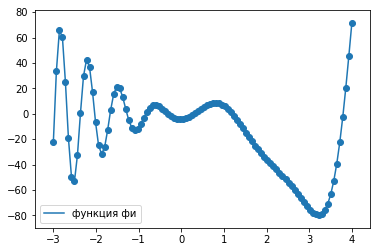

In [353]:
import matplotlib.pyplot as plt
%matplotlib inline

t = np.linspace(-3, 4, 100)       
q = np.zeros(100)

#for i in range(100):                   
    #q[i] = (8*t*t+4)*np.cos(t*t-t*5+3)
plt.plot(t, (8*t*t+4)*np.cos(t*t-t*5+3), label = 'функция фи')
plt.scatter(t, (8*t*t+4)*np.cos(t*t-t*5+3))

plt.legend()